<a href="https://colab.research.google.com/github/micahvarkyez/Python/blob/main/DataScienceMajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
df = pd.read_csv('/content/IRIS.csv')

In [32]:
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
import warnings as wrn
wrn.filterwarnings('ignore')

In [35]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [36]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
describe = df.describe()
describe.drop("Id",axis=1,inplace=True)
describe
data2 = df.copy()

In [39]:
def outlier_dropper(dataFrame,describeFrame):
    drp = 0
    for clm in describeFrame:
        Q3 = describeFrame[clm]["75%"]
        Q1 = describeFrame[clm]["25%"]
        IQR = (Q3-Q1)*1.5
        lower = Q1-IQR
        upper = Q3 + IQR
        ind = dataFrame[(dataFrame[clm]<lower) | (dataFrame[clm]>upper)].index.values
        dataFrame.drop(ind,inplace=True)
        drp += len(ind)
    return dataFrame,drp
        
df,dropcount = outlier_dropper(df,describe)

print("There is/are",dropcount,"outlier values")

There is/are 4 outlier values


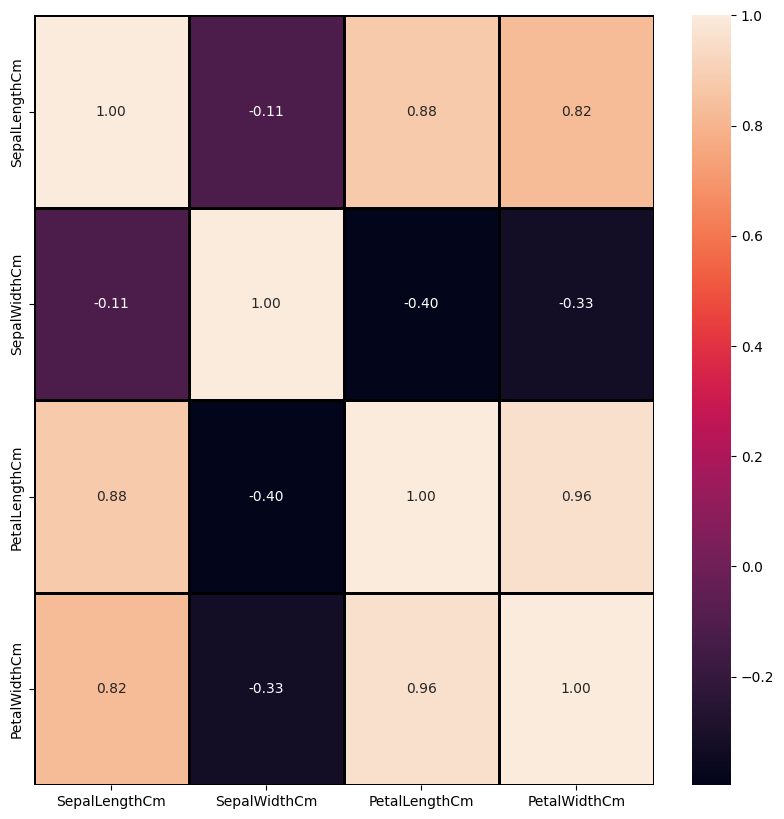

In [40]:
corr = df.corr()
corr.drop("Id",axis=1,inplace=True)
corr.drop("Id",axis=0,inplace=True)

fig,ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr,annot=True,fmt="0.2f",linewidth=1,linecolor="Black",ax=ax)
plt.show()

TypeError: ignored

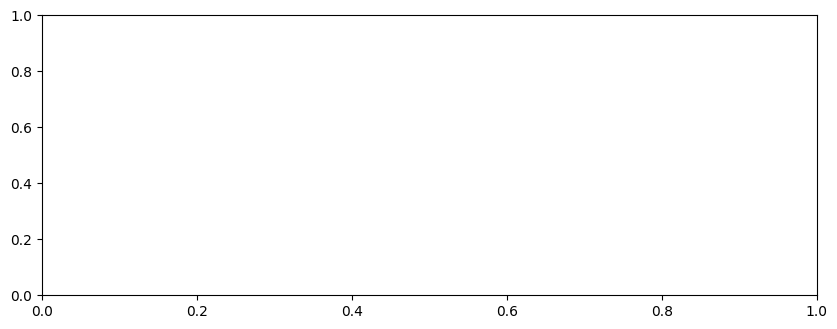

In [43]:
figure = plt.figure(figsize=(22,8))

# Scatter plot
ax = figure.add_subplot(2,2,1)
sns.scatterplot("PetalLengthCm","SepalLengthCm",data=df,ax=ax,s=100,color="green")

# Kde Plot
ax = figure.add_subplot(2,2,2)
sns.kdeplot(df["PetalLengthCm"],df["SepalLengthCm"],ax=ax,color="Green",cmap="BuPu")

#Distplot for PetalLengthCm Feature
ax = figure.add_subplot(2,2,3)
sns.distplot(df["PetalLengthCm"],color="red")

#Distplot for SepalLengthCm Feature
ax = figure.add_subplot(2,2,4)
sns.distplot(df["SepalLengthCm"],color="cyan")

plt.show()

TypeError: ignored

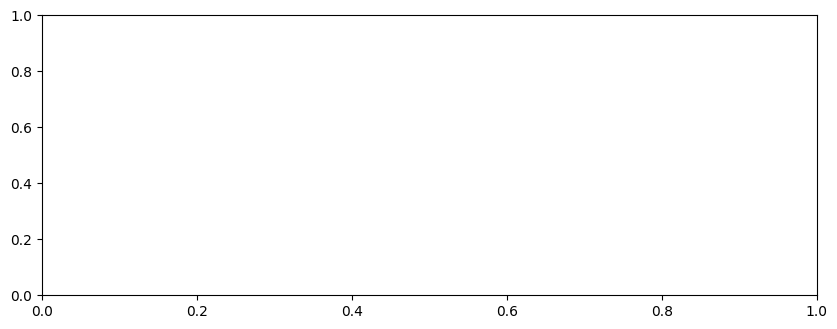

In [44]:
figure = plt.figure(figsize=(22,8))

# Scatter plot
ax = figure.add_subplot(2,2,1)
sns.scatterplot("PetalWidthCm","SepalLengthCm",data=df,ax=ax,s=100,color="orange")

#KDE Plot
ax = figure.add_subplot(2,2,2)
sns.kdeplot(df["PetalWidthCm"],df["SepalLengthCm"],ax=ax,color="Green",cmap="Accent")

# Distplot for PetalWidthCm Feature
ax = figure.add_subplot(2,2,3)
sns.distplot(df["PetalWidthCm"],color="purple")

# Distplot for SepalLengthCm Feature
ax = figure.add_subplot(2,2,4)
sns.distplot(df["SepalLengthCm"],color="brown")

plt.show()
#data = {
   # 'x': [1, 2, 3, 4, 5],
    #'y': [2, 4, 6, 8, 10]...this is not working

TypeError: ignored

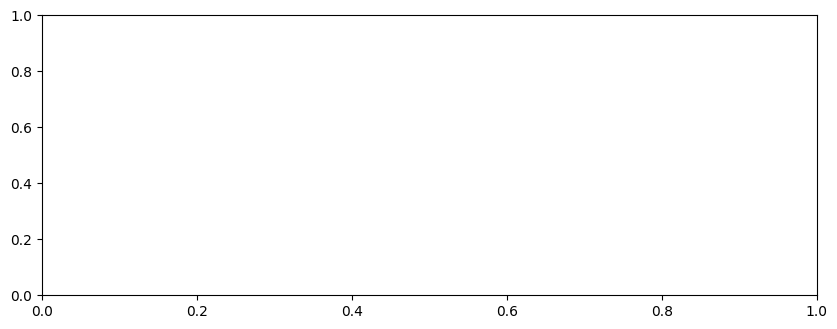

In [55]:
figure = plt.figure(figsize=(22,8))
# Scatter plot
ax = figure.add_subplot(2,2,1)
plt.scatter("PetalWidthCm","PetalLengthCm",data=df,ax=ax,s=100,color="#74D1ED")

#KDE Plot
ax = figure.add_subplot(2,2,2)
sns.kdeplot(df["PetalWidthCm"],df["PetalLengthCm"],ax=ax,color="Green",cmap="tab20_r")

# Distplot for PetalWidthCm Feature
ax = figure.add_subplot(2,2,3)
sns.distplot(df["PetalWidthCm"],color="#F8079B",ax=ax)

# Distplot for PetalLengthCm Feature
ax = figure.add_subplot(2,2,4)
sns.distplot(df["PetalLengthCm"],color="#2507F8",ax=ax)

plt.show()

In [46]:
petal_ln_LR = LinearRegression()

In [47]:
x = df["PetalWidthCm"].values.reshape(-1,1) 
petal_length_y = df["PetalLengthCm"].values.reshape(-1,1)

In [48]:
petal_ln_LR.fit(x,petal_length_y)

LinearRegression()

In [49]:
petal_length_y_head = petal_ln_LR.predict(x)

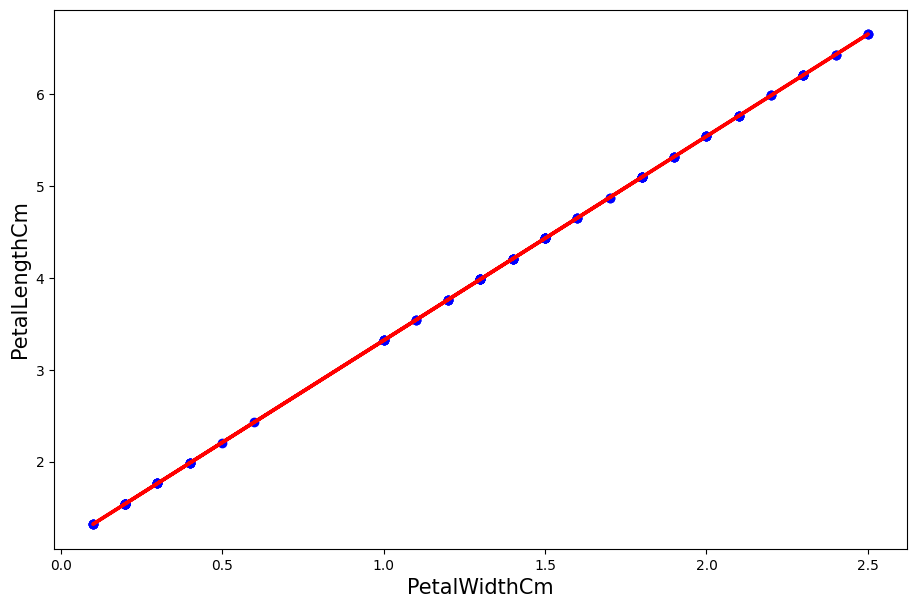

In [54]:
fig,ax = plt.subplots(figsize=(11,7))
plt.scatter(x,list(petal_length_y_head),color="Blue")
plt.plot(x,list(petal_length_y_head),color="Red",linewidth=2.5)
plt.xlabel("PetalWidthCm",fontsize=15)
plt.ylabel("PetalLengthCm",fontsize=15)
plt.show()

In [58]:
from sklearn.metrics import r2_score
print("Accuracy of the model is",r2_score(petal_length_y,petal_length_y_head))

Accuracy of the model is 0.9249730738963468


In [59]:
from sklearn.model_selection import train_test_split # In order to split, I am going to use this function

x = df.drop("Species",axis=1)
y = df.Species

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))#this is knn classification

1.0


In [62]:
# First I create an linear regression object
sepalLength_MLR = LinearRegression()

#Then I train it
x = df.loc[:,["PetalWidthCm","PetalLengthCm"]].values
sepal_length_y = df["SepalLengthCm"].values.reshape(-1,1)
sepalLength_MLR.fit(x,sepal_length_y)

# And now I am ready to do some predictions
sepal_length_y_head = sepalLength_MLR.predict(x)
y_head2 = sepal_length_y_head.reshape(-1) # Scalar 


# Visualizations using Plotly
trace = go.Scatter3d(x=df["PetalWidthCm"]
                    ,y=df["PetalLengthCm"]
                    ,z= y_head2
                    ,name="SepalLengthCm"
                    ,marker=dict(color="rgba(255,0,0,0.8)")
                    ,mode="markers"
                    ,text=y_head2)

layout = go.Layout(title="SepalLengthCm Prediction",xaxis=dict(title="PetalWidthCm")
                  ,yaxis=dict(title="PetalLengthCm"))


figure = go.Figure(data=trace)

iplot(figure)

In [63]:
print(r2_score(sepal_length_y,sepal_length_y_head))

0.7804517285359545


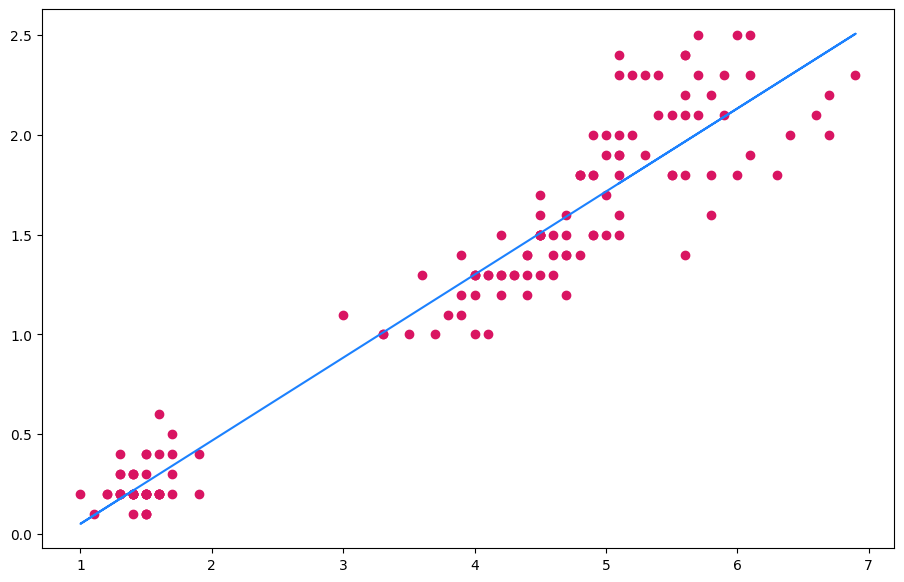

In [64]:
x = df["PetalLengthCm"].values.reshape(-1,1)
petal_width_y = df["PetalWidthCm"].values.reshape(-1,1)

petalWidthRegression = LinearRegression()
petalWidthRegression.fit(x,petal_width_y)

petal_width_y_head = petalWidthRegression.predict(x)


fig,ax = plt.subplots(figsize=(11,7))
plt.scatter(x,petal_width_y,color="#D91462")
plt.plot(x,petal_width_y_head,color="#1C81FE")
plt.show()

In [65]:
print(r2_score(petal_width_y,petal_width_y_head))

0.9249730738963468


In [66]:
#this prediction was under multiple linear regression